 Interprétation et Visualisation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("cve_enrichies.csv", sep=";")
df.head(10)

,ID_ANSSI,Titre_ANSSI,Type,Date,CVE,CVSS,Base_Severity,CWE,EPSS,Lien,Description,Éditeur,Produit,Versions_Affectées
0,CERTFR-2025-AVI-1076,Multiples vulnérabilités dans MISP (08 décembr...,avis,"Mon, 08 Dec 2025 00:00:00 +0000",CVE-2025-67906,5.4,Moyenne,CWE-79,0.00035,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"In MISP before 2.5.28, app/View/Elements/Workf...",MISP,MISP,0
1,CERTFR-2025-AVI-1096,Multiples vulnérabilités dans Google Chrome (1...,avis,"Thu, 11 Dec 2025 00:00:00 +0000",CVE-2025-14174,NaN,NaN,Non disponible,0.00409,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Out of bounds memory access in ANGLE in Google...,Google,Chrome,143.0.7499.110
2,CERTFR-2025-AVI-1096,Multiples vulnérabilités dans Google Chrome (1...,avis,"Thu, 11 Dec 2025 00:00:00 +0000",CVE-2025-14373,NaN,NaN,Non disponible,0.00030,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Inappropriate implementation in Toolbar in Goo...,Google,Chrome,143.0.7499.110
3,CERTFR-2025-AVI-1096,Multiples vulnérabilités dans Google Chrome (1...,avis,"Thu, 11 Dec 2025 00:00:00 +0000",CVE-2025-14372,NaN,NaN,CWE-416,0.00040,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Use after free in Password Manager in Google C...,Google,Chrome,143.0.7499.110
4,CERTFR-2025-AVI-1108,Multiples vulnérabilités dans les produits IBM...,avis,"Fri, 12 Dec 2025 00:00:00 +0000",CVE-2023-48795,NaN,NaN,Non disponible,0.47891,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,The SSH transport protocol with certain OpenSS...,NaN,NaN,NaN
5,CERTFR-2025-AVI-1108,Multiples vulnérabilités dans les produits IBM...,avis,"Fri, 12 Dec 2025 00:00:00 +0000",CVE-2023-53386,NaN,NaN,Non disponible,0.00018,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"In the Linux kernel, the following vulnerabili...",Linux,Linux,5.7
6,CERTFR-2025-AVI-1108,Multiples vulnérabilités dans les produits IBM...,avis,"Fri, 12 Dec 2025 00:00:00 +0000",CVE-2025-39817,NaN,NaN,Non disponible,0.00049,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"In the Linux kernel, the following vulnerabili...",Linux,Linux,3.9
7,CERTFR-2025-AVI-1108,Multiples vulnérabilités dans les produits IBM...,avis,"Fri, 12 Dec 2025 00:00:00 +0000",CVE-2023-53178,NaN,NaN,Non disponible,0.00016,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"In the Linux kernel, the following vulnerabili...",Linux,Linux,3.11
8,CERTFR-2025-AVI-1108,Multiples vulnérabilités dans les produits IBM...,avis,"Fri, 12 Dec 2025 00:00:00 +0000",CVE-2024-13009,7.2,Élevée,CWE-404,0.00071,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,In Eclipse Jetty versions 9.4.0 to 9.4.56 a bu...,Eclipse Foundation,Jetty,9.4.0
9,CERTFR-2025-AVI-1108,Multiples vulnérabilités dans les produits IBM...,avis,"Fri, 12 Dec 2025 00:00:00 +0000",CVE-2025-39841,NaN,NaN,Non disponible,0.00049,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"In the Linux kernel, the following vulnerabili...",Linux,Linux,5.1


Histogramme des scores CVSS : pour observer la distribution des vulnérabilités
selon leur niveau de gravité (critique, élevée, moyenne)

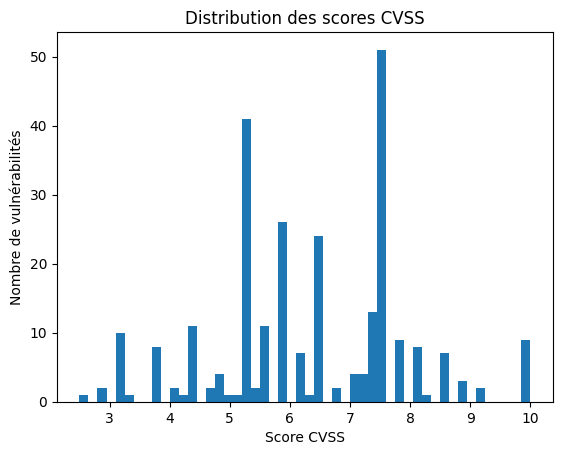

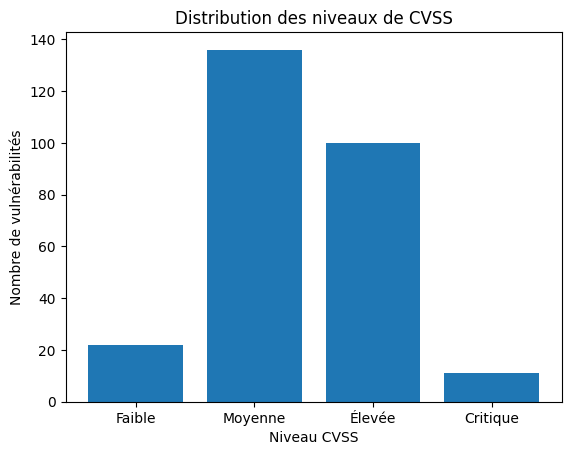

In [ ]:
plt.figure()
plt.hist(df["CVSS"].dropna(), bins=50)
plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()
print("\n")

ordre = ["Faible", "Moyenne", "Élevée", "Critique"]
counts = df["Base_Severity"].value_counts()
counts = counts.reindex(ordre)
plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Distribution des niveaux de CVSS")
plt.xlabel("Niveau CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()


*  Les scores sont surtout concentrés dans une zone moyenne-haute (≈ 5 à 8).
*   La majorité des vulnérabilités est Moyenne, puis Élevée.
*  Les "Critiques" sont rares → l’alerte “urgence” doit viser un petit sous-ensemble, sinon on sur-alerte.



Diagramme circulaire des CWE les plus fréquents

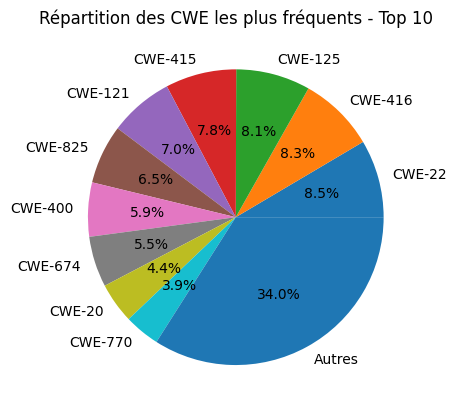

In [ ]:
counts = df["CWE"].value_counts().drop("Non disponible", errors="ignore") #on ignore les CWE non dispo

top_n = 10
top = counts.head(top_n) #valeurs trié par défaut par ordre décroissant
autres = counts.iloc[top_n:].sum()

if autres > 0:
    top["Autres"] = autres

plt.figure()
plt.pie(top.values, labels=top.index, autopct="%.1f%%")
plt.title("Répartition des CWE les plus fréquents - Top 10")
plt.show()



*  Le “Top 10” ne couvre pas tout : “Autres” ≈ 34% → les failles sont très diversifiées




Diagramme circulaire des types de vulnérabilités (CWE) : pour identifier les
catégories de faiblesses les plus fréquentes (par exemple : Injection SQL,
Débordement de mémoire, Authentification contournée).

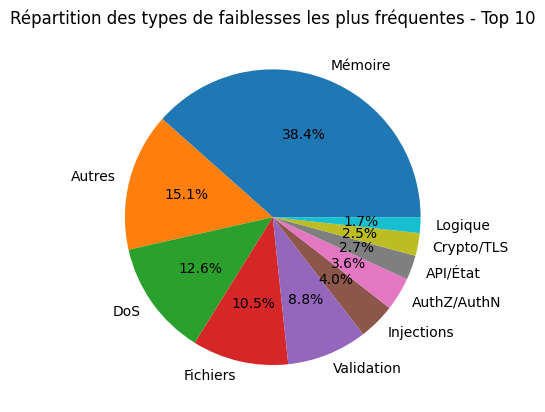

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

counts = df["CWE"].value_counts().drop("Non disponible", errors="ignore") # Recalculate counts

cwe_vers_probleme = {
    # Fichiers / chemins / permissions fichier
    "CWE-22": "Fichiers",
    "CWE-61": "Fichiers",
    "CWE-378": "Fichiers",
    "CWE-59": "Fichiers",

    # Mémoire (corruption, overflow, UAF, fuites)
    "CWE-121": "Mémoire",
    "CWE-122": "Mémoire",
    "CWE-125": "Mémoire",
    "CWE-170": "Mémoire",
    "CWE-190": "Mémoire",
    "CWE-401": "Mémoire",
    "CWE-404": "Mémoire",
    "CWE-409": "Mémoire",
    "CWE-416": "Mémoire",
    "CWE-476": "Mémoire",
    "CWE-787": "Mémoire",
    "CWE-789": "Mémoire",
    "CWE-825": "Mémoire",

    # DoS / crash / robustesse
    "CWE-400": "DoS",
    "CWE-407": "DoS",
    "CWE-674": "DoS",
    "CWE-755": "DoS",
    "CWE-835": "DoS",
    "CWE-909": "DoS",

    # Validation / encodage / parsing
    "CWE-20": "Validation",
    "CWE-75": "Validation",
    "CWE-113": "Validation",
    "CWE-116": "Validation",
    "CWE-129": "Validation",
    "CWE-130": "Validation",
    "CWE-147": "Validation",
    "CWE-248": "Validation",
    "CWE-349": "Validation",
    "CWE-392": "Validation",
    "CWE-393": "Validation",
    "CWE-444": "Validation",
    "CWE-489": "Validation",
    "CWE-650": "Validation",

    # AuthN/AuthZ / contrôle d’accès / permissions
    "CWE-250": "AuthZ/AuthN",
    "CWE-268": "AuthZ/AuthN",
    "CWE-279": "AuthZ/AuthN",
    "CWE-284": "AuthZ/AuthN",
    "CWE-285": "AuthZ/AuthN",
    "CWE-287": "AuthZ/AuthN",
    "CWE-303": "AuthZ/AuthN",
    "CWE-356": "AuthZ/AuthN",
    "CWE-364": "AuthZ/AuthN",
    "CWE-639": "AuthZ/AuthN",
    "CWE-732": "AuthZ/AuthN",
    "CWE-862": "AuthZ/AuthN",
    "CWE-863": "AuthZ/AuthN",

    # Crypto / hasard / TLS
    "CWE-295": "Crypto/TLS",
    "CWE-324": "Crypto/TLS",
    "CWE-338": "Crypto/TLS",

    # Injections (XSS / commande / code / SSRF / désérialisation / XXE / regex, etc.)
    "CWE-78": "Injections",
    "CWE-79": "Injections",
    "CWE-93": "Injections",
    "CWE-94": "Injections",
    "CWE-502": "Injections",
    "CWE-611": "Injections",
    "CWE-918": "Injections",

    # Concurrence / race conditions
    "CWE-233": "Concurrence",
    "CWE-362": "Concurrence",
    "CWE-367": "Concurrence",
    "CWE-669": "Concurrence",

    # InfoLeak / exposition d’info / secrets
    "CWE-200": "InfoLeak",
    "CWE-203": "InfoLeak",
    "CWE-209": "InfoLeak",
    "CWE-212": "InfoLeak",
    "CWE-359": "InfoLeak",
    "CWE-524": "InfoLeak",
    "CWE-602": "InfoLeak",

    # Réseau / HTTP (en-têtes, redirections, etc.)
    "CWE-113": "Réseau/HTTP",
    "CWE-392": "Réseau/HTTP",
    "CWE-393": "Réseau/HTTP",

    # Logique / calcul
    "CWE-682": "Logique",
    "CWE-908": "Logique",

    # API / état / conception / divers
    "CWE-407": "API/État",
    "CWE-440": "API/État",
    "CWE-524": "API/État",
    "CWE-665": "API/État",
    "CWE-670": "API/État",
    "CWE-843": "API/État",
    "CWE-943": "API/État",
}
dico={}
for cwe, count_val in counts.items():
  try :
    problem_category = cwe_vers_probleme[cwe]
    if problem_category not in dico :
      dico[problem_category] = count_val
    else :
      dico[problem_category] += count_val
  except KeyError :
    if "Autres" not in dico :
      dico["Autres"] = count_val
    else :
      dico["Autres"] += count_val

d_sorted = dict(sorted(dico.items(), key=lambda x: x[1], reverse=True))

labels = list(d_sorted.keys())[:10]
values = list(d_sorted.values())[:10]

plt.figure()
plt.pie(values, labels, autopct="%.1f%%")
plt.title("value_dico_top")
plt.show()



*   Les faiblesses Mémoire dominent très nettement (≈ 38%).
*   DoS, Fichiers, Validation forment un second bloc significatif → le risque global est tiré surtout par des classes techniques (mémoire, DoS/fichiers).



Courbe des scores EPSS : pour comprendre la probabilité d'exploitation des
vulnérabilités recensées et les prioriser en fonction de leur risque réel.

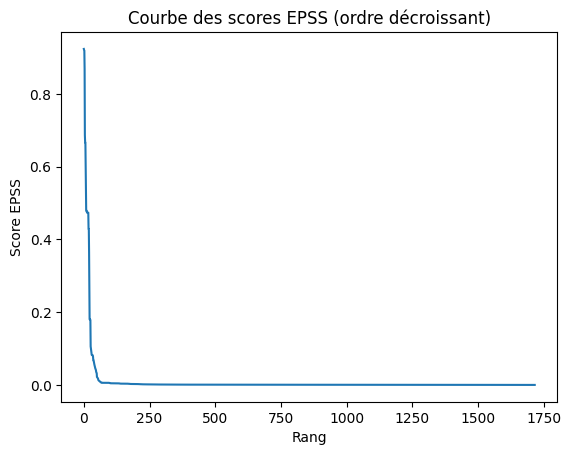

In [ ]:
epss_sorted = df["EPSS"].dropna().sort_values(ascending=False).reset_index(drop=True)

plt.figure()
plt.plot(epss_sorted)
plt.title("Courbe des scores EPSS (ordre décroissant)")
plt.xlabel("Rang")
plt.ylabel("Score EPSS")
plt.show()



*   Courbe en “falaise” : très peu de vulnérabilités ont un EPSS élevé, puis une longue traîne proche de 0.
*   l’EPSS est un excellent filtre d’alerte immédiate (les tout premiers rangs).



Classement des produits les plus affectés : pour mettre en lumière
les systèmes les plus vulnérables et cibler les actions à entreprendre.

In [ ]:
top_produits = (
    df.groupby("Produit").size().sort_values(ascending=False).head(10)
)
print(top_produits, "\n")

top_editeurs = (
    df.groupby("Éditeur").size().sort_values(ascending=False).head(10)
)
print(top_editeurs)

Produit
Linux                                818
macOS                                 44
Java SE JDK and JRE                   24
iOS and iPadOS                        24
Oracle Java SE                        18
Oracle GraalVM Enterprise Edition     18
Red Hat Enterprise Linux 8            17
visionOS                              17
Red Hat Enterprise Linux 9            17
Oracle GraalVM for JDK                17
dtype: int64 

Éditeur
Linux                         818
Red Hat                       294
Apple                         115
Oracle Corporation             77
Go standard library            59
IBM                            38
Google                         30
Apache Software Foundation     18
Foxit Software Inc.            16
Meta                           15
dtype: int64


Le fait qu'un produit/éditeur soit présent dans ce classement ne veut pas dire qu'il est très deffaillant mais peut refléter le fait qu'il soit beacoup audité

Heatmap des corrélations entre CVSS et EPSS : Analyser la relation entre le score
CVSS (niveau de gravité) et le score EPSS (probabilité d'exploitation).

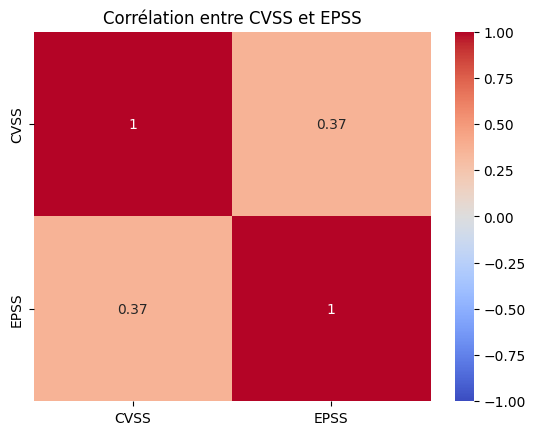

In [ ]:
import seaborn as sns
df_cvss_epss = df[["CVSS", "EPSS"]].dropna()  # Supprimer les NaN

corr_matrix = df_cvss_epss.corr()  # Calculer la matrice de corrélation (Pearson)

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation entre CVSS et EPSS")
plt.show()



*   Corrélation modérée seulement : un CVSS haut n’implique pas forcément une exploitation probable, et inversement
*   CVSS seul ne suffit pas pour décider d’alerter



Nuage de points entre Score CVSS et Score EPSS : Visualiser comment la
probabilité d'exploitation (EPSS) évolue par rapport au niveau de gravité (CVSS)

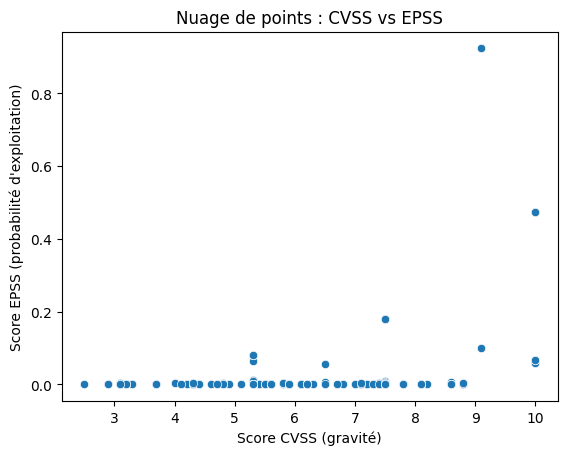

In [ ]:
plt.figure()
sns.scatterplot(data=df_cvss_epss, x="CVSS", y="EPSS")
plt.title("Nuage de points : CVSS vs EPSS")
plt.xlabel("Score CVSS (gravité)")
plt.ylabel("Score EPSS (probabilité d'exploitation)")
plt.show()



*   La plupart des points sont à EPSS ~ 0, même avec des CVSS élevés.
*   Quelques EPSS très haut ressortent : ce sont eux qui justifient une alerte prioritaire, car ils combinent gravité et probabilité d’exploitation



Courbe cumulative des vulnérabilités en fonction du temps : Montrer l’évolution
temporelle du nombre de vulnérabilités détectées.

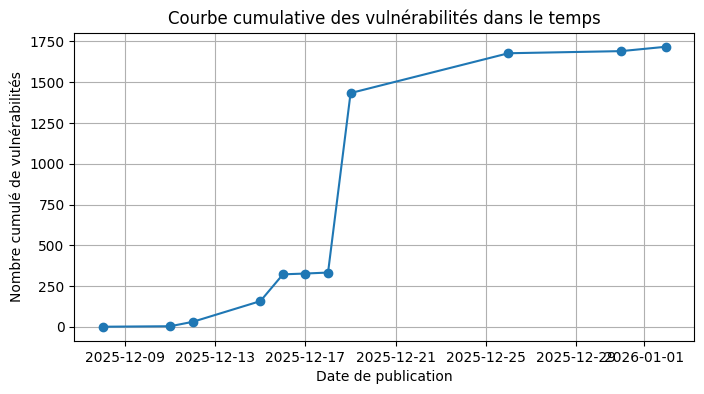

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce") # valeurs non convertibles deviennent NaT

df_time = df.dropna().sort_values("Date")

vulns_per_day = df.groupby("Date").size()

cumul_vulns = vulns_per_day.cumsum()

# Tracer la courbe
plt.figure(figsize=(8,4))
plt.plot(cumul_vulns.index, cumul_vulns.values, marker='o', linestyle='-')
plt.title("Courbe cumulative des vulnérabilités dans le temps")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulé de vulnérabilités")
plt.grid(True)
plt.show()



*   Au fil du temps de nouvelles vulnérabilités sont découverte et s'ajoute à celle existantes




Boxplot des scores CVSS par éditeur : Montrer la dispersion des scores CVSS
pour les éditeurs les plus affectés.

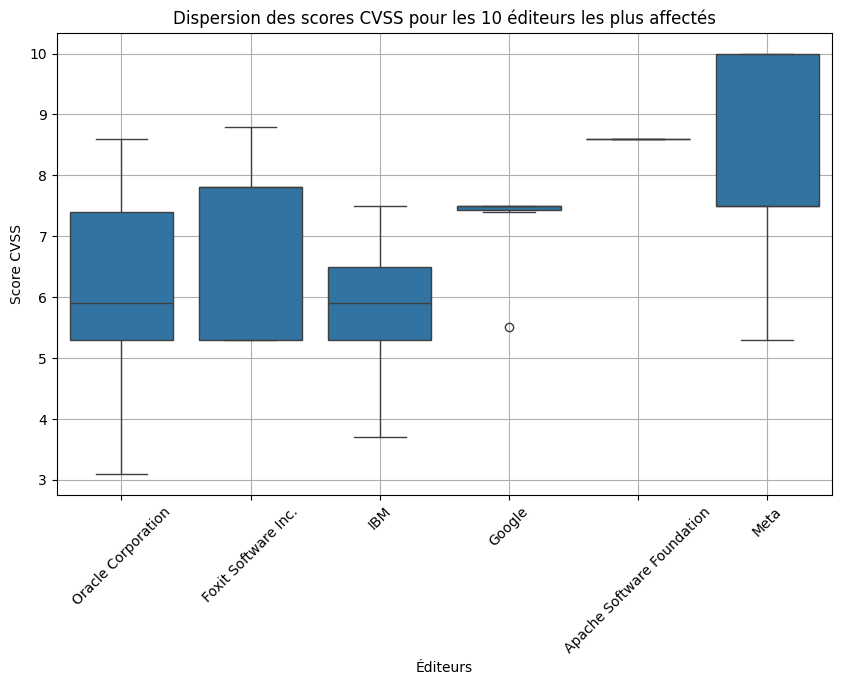

In [ ]:
df_top = df[df["Éditeur"].isin(top_editeurs.index)]
df_editeurs_cvss=df_top[["Éditeur","CVSS"]].dropna()
plt.figure(figsize=(10,6))
sns.boxplot(x="Éditeur", y="CVSS", data=df_editeurs_cvss)
plt.xticks(rotation=45)  # pour que les noms des éditeurs ne se chevauchent pas
plt.title("Dispersion des scores CVSS pour les 10 éditeurs les plus affectés")
plt.ylabel("Score CVSS")
plt.xlabel("Éditeurs")
plt.grid()
plt.show()




*    Les éditeurs n’ont pas tous le même profil : certains ont une dispersion large (gravités très variées), d’autres sont plus homogènes.
*    Meta et Apache éditeur qu'il faut surveiller de très près car il concentre des vulnérabilité potentiellement critiques



Visualiser les versions les plus fréquemment touchées des produits concernés.


In [ ]:
df_top_produit = df[df["Produit"].isin(top_produits.index)]
df_produit_versions = df_top_produit[["Produit", "Versions_Affectées"]].dropna()

dico_versions = {}
for produit, versions in df_produit_versions.itertuples(index=False):
    for version in str(versions).split(","):
        if version == "" or version.lower() == "unspecified":
            continue
        dico_versions.setdefault(produit, []).append(version)

df_long = pd.DataFrame(
    [(p, v) for p, vs in dico_versions.items() for v in vs],
    columns=["Produit", "Version"]
)

df_counts = (df_long.groupby(["Produit", "Version"]).size().reset_index(name="Occurrences"))

top3_par_produit = (df_counts.sort_values(["Produit", "Occurrences"], ascending=[True, False]).groupby("Produit").head(3).reset_index(drop=True))

affichage = (top3_par_produit.groupby("Produit")["Version"].apply(lambda s: ", ".join(s.tolist())).reset_index(name="Top_3_versions"))

print(affichage.to_string(index=False))







                          Produit                                                                                              Top_3_versions
              Java SE JDK and JRE  Oracle GraalVM Enterprise Edition:20.3.4,  Oracle GraalVM Enterprise Edition:21.3.0,  Oracle Java SE:8u311
                            Linux                                                                                         2.6.12, 5.4, 2.6.29
Oracle GraalVM Enterprise Edition                                                                                  21.3.15,  21.3.13, 20.3.17
           Oracle GraalVM for JDK                                                                                    21.0.8, 17.0.16,  21.0.6
                   Oracle Java SE                                                                                      25,  11.0.28,  17.0.16




*   Quelques produits ressortent avec des versions qui reviennent souvent
*   Permet de mieux cibler les clients qui sont exposé aux versions deffectueurse et donc personnaliser l'alerte

